In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv('C:/Users/jothe/OneDrive/Desktop/Project/CODESOFT/Customer-churn-dataset/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#0->Not Churn
#1->Churn
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])
X=data.drop(['Surname','Exited'],axis=1)
Y=data['Exited']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
lc=LogisticRegression()
lc.fit(X_train,Y_train)

LogisticRegression()

In [16]:
pred1=lc.predict(X_test)
df=pd.DataFrame({"Predicted":pred1,"Original":Y_test})
df.sample(n=5)

,Predicted,Original
828,0,0
833,0,0
683,0,0
9767,0,0
5623,0,0


In [18]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
pred2=gb.predict(X_test)
df=pd.DataFrame({"Predicted":pred2,"Original":Y_test})
df.sample(n=5)

,Predicted,Original
3012,0,0
8,0,0
453,0,0
3053,0,0
1429,0,0


In [20]:
print("The Acuuracy of Logistic Regression:",accuracy_score(pred1,Y_test))
print("The Acuuracy of Gradient Booosting::",accuracy_score(pred2,Y_test))

The Acuuracy of Logistic Regression: 0.8035
The Acuuracy of Gradient Booosting:: 0.865


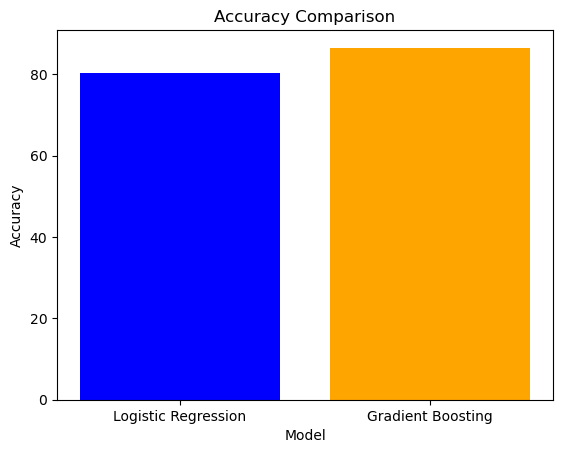

In [27]:
models = ['Logistic Regression', 'Gradient Boosting']
accuracy = [accuracy_score(pred1,Y_test)*100,accuracy_score(pred2,Y_test)*100]

plt.bar(models, accuracy, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()
